# YouTube energy comparison with and without low-util mode

Test: Run YouTube red video (in offline mode) for 120 seconds, and collect energy around 10 times for each configuration

Conclusion: YouTube saves around 1.5-2% energy due to low-utilization mode.

(side note: following is the energy consumed when offlining big cpus, the savings is ~4%)
    "output": 20.935927396987264
    "output": 20.886319054545837
    "output": 20.873948319403212
    "output": 20.80955464619092
    "output": 20.816727961893836
    "output": 20.803202597131868

In [2]:
%pylab inline

import pandas as pd
import sqlite3
import matplotlib.cm as cm
import os, json
from collections import namedtuple

# Provide the root path where your test folders are stored
results_dir = '/home/joelaf/repo/lisa-aosp/external/lisa/results/'

# Provide the names of the results folders you want compared
all_test_dirs = [
                 ("YouTubeRed_4.4.56-g0583b6191868", 'top-of-tree'),
                 ("YouTubeRed_4.4.56-g931b784e1a3f-30070-ga668ea9c5165", 'tot+lowutil+25pc'),
                 ("YouTubeRed_4.4.56-g931b784e1a3f-30071-g099f7067358a", 'tot+lowutilmode+50pc')
                ]

results_dirs = [x[0] for x in os.walk(results_dir)]

def get_edir(test):
    edir = test + '_energy'
    return [x for x in results_dirs if edir in x]

def get_samples(test):
    samples = []
    edirs = get_edir(test)
    for edir in edirs:
        with open(edir + '/energy.json') as f:
            output = json.load(f)['output']
        samples.append(output)
    return samples

get_samples(all_test_dirs[2][0])
    

Populating the interactive namespace from numpy and matplotlib


[21.33999307201658,
 21.365129290570263,
 21.34209450334471,
 21.289426409399248,
 21.263789089763883,
 21.329407238590395]

# Plot histograms of energy consumed for tests

('YouTubeRed_4.4.56-g0583b6191868', 'top-of-tree')
21.5895253595
21.6164255475
21.5485038682
22.0296997264
21.6493742035
21.5483970834
21.5943349871
21.6647268717
('YouTubeRed_4.4.56-g931b784e1a3f-30070-ga668ea9c5165', 'tot+lowutil+25pc')
21.3110673127
21.4832853056
21.4711717277
21.48856738
21.3084231193
21.3057657682
21.2137620153
21.198791322
21.3047078781
21.312377348
21.2130661441
('YouTubeRed_4.4.56-g931b784e1a3f-30071-g099f7067358a', 'tot+lowutilmode+50pc')
21.339993072
21.3651292906
21.3420945033
21.2894264094
21.2637890898
21.3294072386


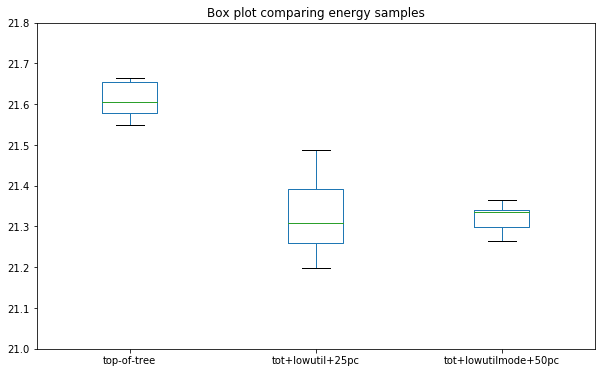

In [6]:
# Plot a box plot
fig, axes = plt.subplots()
df_all = []
for test in all_test_dirs:
    samples = get_samples(test[0])
    df = pd.DataFrame(samples, columns=[test[1]])
    # print df.describe()
    print test
    for s in samples:
        print s
    df_all.append(df)

df_box = pd.concat(df_all, axis=1)
axes = df_box.plot.box(figsize=(10, 6), ax=axes, ylim=(21,21.8), title="Box plot comparing energy samples")

# Plot a histogram of energy values collected
# def plot_energy(test):
#    test_dir = results_dir + "/" + test
#    with open(test_dir + "/energy_all_runs.json") as f:
#        samples = json.load(f)['energy_samples']
#    df = pd.DataFrame(samples, columns=['energy'])
#    fig, axes = plt.subplots()
#    # print axes
#    df.plot(kind='hist', bins=32, xlim=(6,10), title=test, figsize=(16,5), ax=axes)

# for t in all_test_dirs:
#    plot_energy(t)
